<a href="https://colab.research.google.com/github/brunokobi/Rede_Neurais/blob/main/Reutes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Define parâmetros para a rede neural
max_words = 10000
epochs = 6

# Carregue os dados Reuters e divida em conjuntos de treinamento e teste
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words)

# Converta os dados em vetores binários one-hot
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Crie o modelo sequencial________________________________________________
model = Sequential()

#Essa linha adiciona uma camada densa à rede neural 512 neurois
model.add(Dense(512, input_shape=(max_words,)))

#Essa linha adiciona uma camada de ativação softmax à rede neural.
model.add(Activation('relu'))

# Regularização comumente usada em redes neurais profundas para evitar o overfitting
model.add(Dropout(0.5))

#Essa linha adiciona uma camada densa à rede neural.
model.add(Dense(y_train.shape[1]))

#Essa linha adiciona uma camada de ativação softmax à rede neural.
model.add(Activation('softmax'))


# Compile o modelo________________________________________________
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Treine o modelo

history = model.fit(x_train, y_train,epochs=epochs, batch_size=512,validation_data=(x_test,y_test))

# Avalie o modelo no conjunto de teste
score = model.evaluate(x_test, y_test)
print('Acurácia: {:.2f} %'.format(round(score[1], 4)*100))


Epoch 1/6
18/18 [==============================] - 5s 251ms/step - loss: 1.9153 - accuracy: 0.5963 - val_loss: 1.2957 - val_accuracy: 0.7119
Epoch 2/6
18/18 [==============================] - 6s 314ms/step - loss: 1.0511 - accuracy: 0.7715 - val_loss: 1.0721 - val_accuracy: 0.7622
Epoch 3/6
18/18 [==============================] - 4s 242ms/step - loss: 0.7806 - accuracy: 0.8288 - val_loss: 0.9618 - val_accuracy: 0.7747
Epoch 4/6
18/18 [==============================] - 4s 246ms/step - loss: 0.6063 - accuracy: 0.8707 - val_loss: 0.8792 - val_accuracy: 0.8032
Epoch 5/6
18/18 [==============================] - 6s 316ms/step - loss: 0.4875 - accuracy: 0.8955 - val_loss: 0.8312 - val_accuracy: 0.8023
Epoch 6/6
71/71 [==============================] - 1s 12ms/step - loss: 0.8364 - accuracy: 0.8010
Acurácia: 80.10 %


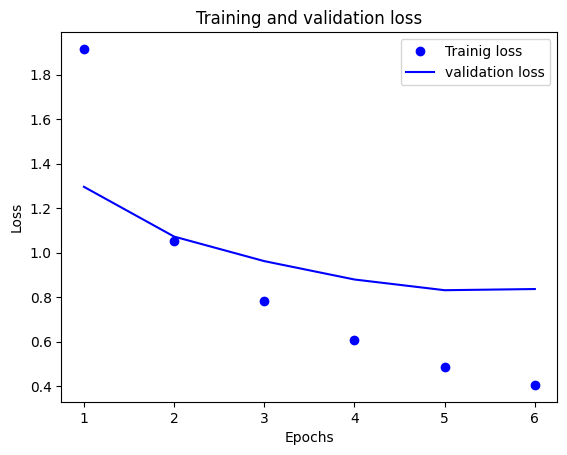

In [63]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

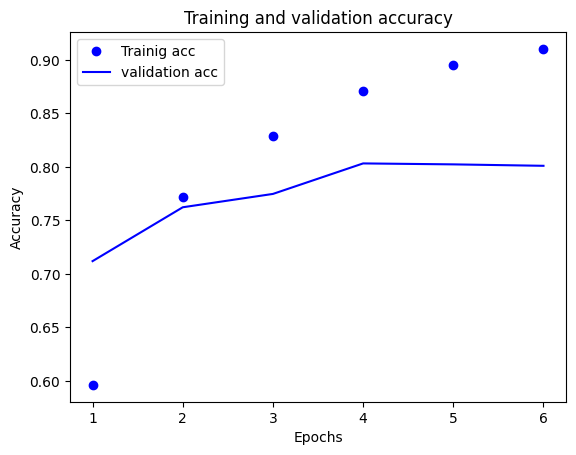

In [64]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()